<a href="https://colab.research.google.com/github/perfectsugar/MachineLearning/blob/master/Test(Lab%E2%80%932).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
%%time
!cat /proc/cpuinfo
!system_profiler SPHardwareDataType
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
# Google ColabのGPU割り当て設定を確認する
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: G

# GDriveをマウントして利用する.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/Data


In [0]:
import google.colab
import googleapiclient.discovery
import googleapiclient.http
google.colab.auth.authenticate_user()
drive_service = googleapiclient.discovery.build('drive', 'v3')

In [0]:
cd /content/Data/My Drive/Colab Notebooks/

/content/Data/My Drive/Colab Notebooks


In [0]:
upload_filename = 'heatmap2.zip'

file_list = drive_service.files().list(q="name='" + upload_filename + "'").execute().get('files')

# ファイル ID を取得します。
file_id = None
for file in file_list:
  if file.get('name') == upload_filename:
    file_id = file.get('id')
    break

if file_id is None:
  # ファイル ID を取得できなかった場合はエラーメッセージを出力します。
  print(upload_filename + ' が見つかりません.')
else:
  # colab 環境へファイルをアップロードします。
  with open(upload_filename, 'wb') as f:
    request = drive_service.files().get_media(fileId=file_id)
    media = googleapiclient.http.MediaIoBaseDownload(f, request)

    done = False
    while not done:
      progress_status, done = media.next_chunk()
      print(100*progress_status.progress(), end="")
      print("%完了")

  print('GoogleドライブからColab環境へのファイル取り込みが完了しました.')


36.613817279952244%完了
73.22763455990449%完了
100.0%完了
GoogleドライブからColab環境へのファイル取り込みが完了しました.


In [0]:
!pwd

/content/Data/My Drive/Colab Notebooks


!tree
!cp -r '/content/Data/My Drive/Colab Notebooks/Dataset_1' '/content/Data/My Drive/'

# Local から Colaboratory上のディスクへデータを転送

In [10]:
print("Hello World!")

Hello World!


In [3]:
import os

!pwd

data_path = '/content/...' 


!ls /content/  

!pwd

!pip install hyperas
!pip install hyperopt

/content
sample_data
/content
     |████████████████████████████████| 337kB 7.5MB/s 
ERROR: ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.9 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.16
    Uninstalling prompt-toolkit-1.0.16:
      Successfully uninstalled prompt-toolkit-1.0.16


In [4]:
import hyperas
from hyperopt import Trials, STATUS_OK, tpe, rand
from hyperas import optim
from hyperas.distributions import choice, uniform

Using TensorFlow backend.


In [0]:
%%time
from google.colab import files
uploaded = files.upload()
!ls -l

Saving heatmap2.7z to heatmap2.7z


## 7z を解凍する場合

In [0]:
start = time.time()

# .7z形式を扱う場合
!apt-get -y install p7zip-full

# ファイルの解凍等
!7z x heatmap2.7z

process_time = time.time() - start

print(process_time)

## Zip を解凍する場合

In [0]:
start = time.time()
!unzip  -q heatmap2.zip
process_time = time.time() - start

print(process_time)


# Keras with Hyper parameter optimization

In [0]:
%%time


import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
import keras.backend as K
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob, os, shutil, cv2, sys,re
from sklearn.model_selection import train_test_split
from PIL import Image
import glob, cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential, model_from_json
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
import tensorflow as tf
import random

# --- 拾った関数 ----
def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+\.(?:' + ext + '))', f.lower())]

# --- フォルダリストを取得 ---
# p_=  '/content/heatmap2/Beginners/*/*/*/'
# p_2 = '/content/heatmap2/Cyclists/*/*/*/'

p_=  '/content/heatmap2/Beginners/KOIKE/*/*/'
p_2 =  '/content/heatmap2/Beginners/KUREMATSU/*/*/'
p_3 =  '/content/heatmap2/Beginners/KURODA/*/*/'

p_4 = '/content/heatmap2/Cyclists/MIZA/*/*/'
p_5 = '/content/heatmap2/Cyclists/SAKOI/*/*/'
p_6 = '/content/heatmap2/Cyclists/YAMANAKA/*/*/'

sys.path.append(p_)

# ---- 保存用配列を確保 ---
folders = [p_, p_2,p_3,  p_4,  p_5, p_6]
X = []
Y = []
image = []
files_name = []
image_size = 100#int(100/2)

# CV2で読み込んだほうが速いそうなので.
# Before: 2m30sec, After: 1min 41sec.
for index, folder in enumerate(folders):
    files_name = glob.glob(folder+"*.png")
    random.shuffle(files_name)
    for i, file in enumerate(files_name):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(image_size, image_size))
        X.append(image)
        if index <3:
          class_index = 0
          Y.append(class_index)
        else:
          class_index = 1
          Y.append(class_index)
#         print(file)
        if i >=20000:
          break;

X = np.array(X)
Y = np.array(Y)

print("X: {0}, Y: {1}".format(X.shape,Y.shape))

X: (90531, 100, 100), Y: (90531,)
CPU times: user 14.1 s, sys: 1.96 s, total: 16.1 s
Wall time: 16.1 s


In [0]:
def create_model(x_train, y_train, x_test, y_test):
  
    model = Sequential()
    
    model.add(Conv2D({{choice([16, 32, 48, 64, 128])}},
              {{choice([2, 3, 5])}}, {{choice([2, 3, 5])}},
    padding='same', 
    input_shape=(image_size,image_size,1)))
    
    model.add(Activation('relu'))
              
    if {{choice(['one','two'])}} == 'two':
        model.add(Conv2D({{choice([16, 32, 48, 64, 128])}},
                  {{choice([2, 3, 5])}}, {{choice([2, 3, 5])}},
        padding='same'))
        model.add(Activation('relu'))
              
    if {{choice(['two','three'])}} == 'three':
        model.add(Conv2D({{choice([16, 32, 48, 64, 128])}},
                  {{choice([2, 3, 5])}}, {{choice([2, 3, 5])}},
        padding='same'))
        model.add(Activation('relu'))
              
    if {{choice(['three','four'])}} == 'four':
        model.add(Conv2D({{choice([16, 32, 48, 64, 128])}},
                  {{choice([2, 3, 5])}}, {{choice([2, 3, 5])}},
        padding='same'))
        model.add(Activation('relu'))
              
    if {{choice(['four','five'])}} == 'five':
        model.add(Conv2D({{choice([16, 32, 48, 64, 128])}},
                  {{choice([2, 3, 5])}}, {{choice([2, 3, 5])}},
        padding='same'))
        model.add(Activation('relu'))
              
    if {{choice(['five','six'])}} == 'six':
        model.add(Conv2D({{choice([16, 32, 48, 64, 128])}},
                  {{choice([2, 3, 5])}}, {{choice([2, 3, 5])}},
        padding='same'))
        model.add(Activation('relu'))
              
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
              

    if {{choice(['one', 'two'])}} == 'two':
        model.add(Dense({{choice([128, 256, 512, 1024])}}))
        model.add(Activation({{choice(['relu', 'sigmoid', 'linear'])}}))
        model.add(Dropout({{uniform(0, 1)}}))
              
    if {{choice(['two', 'three'])}} == 'three':
        model.add(Dense({{choice([128, 256, 512, 1024])}}))
        model.add(Activation({{choice(['relu', 'sigmoid', 'linear'])}}))
        model.add(Dropout({{uniform(0, 1)}}))
              
    if {{choice(['three', 'four'])}} == 'four':
        model.add(Dense({{choice([128, 256, 512, 1024])}}))
        model.add(Activation({{choice(['relu', 'sigmoid', 'linear'])}}))
        model.add(Dropout({{uniform(0, 1)}}))
              
    if {{choice(['four', 'five'])}} == 'five':
        model.add(Dense({{choice([128, 256, 512, 1024])}}))
        model.add(Activation({{choice(['relu', 'sigmoid', 'linear'])}}))
        model.add(Dropout({{uniform(0, 1)}}))
              
    if {{choice(['five', 'six'])}} == 'six':
        model.add(Dense({{choice([128, 256, 512, 1024])}}))
        model.add(Activation({{choice(['relu', 'sigmoid', 'linear'])}}))
        model.add(Dropout({{uniform(0, 1)}}))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}})

    result = model.fit(x_train, y_train,
              batch_size={{choice([128, 256, 512, 1024])}},
              epochs=2,
              verbose=2,
              validation_split=0.2)

    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)

    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}
              
              
def data():

    # --- 訓練データとテストデータに分ける ----
    X2 = X.astype('float32')
    X3 = X2 / 255.0
    Y2 = np_utils.to_categorical(Y, 2)

    # データサイズが熟練者か初心者で偏っている場合はどう判断すべきか
    x_train, x_test, y_train, y_test = train_test_split(X3, Y2, test_size=0.2, random_state=46)
    x_train = x_train.reshape(-1, image_size, image_size, 1)
    x_test = x_test.reshape(-1, image_size, image_size, 1)


    return x_train, y_train, x_test, y_test

In [0]:
best_run, best_model = optim.minimize(model=create_model,data=data, algo=tpe.suggest, max_evals=5,trials=Trials(),
                                      notebook_name='Test(Lab–2)')

X_train, Y_train, X_test, Y_test = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))

print("Best performing model chosen hyper-parameters:")
print(best_run)
    
# ソート
print('--- sorted ---')
sorted_best_run = sorted(best_run.items(), key=lambda x : x[0])

for i, k in sorted_best_run:
  print(i + ' : ' + str(k))

# 精度の履歴をプロット
def plot_history(history):
    print(history.history.keys())

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plt.show()
plot_history(result)
print(max(result.history['acc']))
print(max(result.history['val_acc']))

/content


# Keras 実装開始
---



In [0]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
import keras.backend as K
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob, os, shutil, cv2, sys,re
from sklearn.model_selection import train_test_split
from PIL import Image
import glob, cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential, model_from_json
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
import tensorflow as tf
import random

# --- 拾った関数 ----
def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+\.(?:' + ext + '))', f.lower())]

# --- フォルダリストを取得 ---
# p_=  '/content/heatmap2/Beginners/*/*/*/'
# p_2 = '/content/heatmap2/Cyclists/*/*/*/'

p_=  '/content/heatmap2/Beginners/KOIKE/*/*/'
p_2 =  '/content/heatmap2/Beginners/KUREMATSU/*/*/'
p_3 =  '/content/heatmap2/Beginners/KURODA/*/*/'

p_4 = '/content/heatmap2/Cyclists/MIZA/*/*/'
p_5 = '/content/heatmap2/Cyclists/SAKOI/*/*/'
p_6 = '/content/heatmap2/Cyclists/YAMANAKA/*/*/'

sys.path.append(p_)

# ---- 保存用配列を確保 ---
folders = [p_, p_2,p_3,  p_4,  p_5, p_6]
X = []
Y = []
image_size = 100#int(100/2)

# CV2で読み込んだほうが速いそうなので.
# Before: 2m30sec, After: 1min 41sec.
for index, folder in enumerate(folders):
    files = glob.glob(folder+"*.png")
    random.shuffle(files)
    for i, file in enumerate(files):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(image_size, image_size))
        X.append(image)
        if index <3:
          class_index = 0
          Y.append(class_index)
        else:
          class_index = 1
          Y.append(class_index)
#         print(file)
        if i >=20000:
          break;

X = np.array(X)
Y = np.array(Y)

print("X: {0}, Y: {1}".format(X.shape,Y.shape))

# --- 適当に画像化 ----
# 勝手に8bitに正規化されるので,必ず引数をつけること.
# http://hikuichi.hatenablog.com/entry/2015/12/26/225623
# plt.imshow(X[28,:,:], 'gray', vmin = 0, vmax = 255)

# --- 訓練データとテストデータに分ける ----
X = X.astype('float32')
X = X / 255.0
Y = np_utils.to_categorical(Y, 2)

# データサイズが熟練者か初心者で偏っている場合はどう判断すべきか
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=46)
X_train = X_train.reshape(-1, image_size, image_size, 1)
X_test = X_test.reshape(-1, image_size, image_size, 1)

Using TensorFlow backend.


X: (90531, 100, 100), Y: (90531,)
CPU times: user 22.1 s, sys: 10.9 s, total: 33 s
Wall time: 1min 36s


In [0]:
from keras.callbacks import TensorBoard
from tensorboard.plugins.pr_curve import summary as pr_summary

# Check complete example in:
# https://github.com/akionakamura/pr-tensorboard-keras-example
class PRTensorBoard(TensorBoard):
    def __init__(self, *args, **kwargs):
        # One extra argument to indicate whether or not to use the PR curve summary.
        self.pr_curve = kwargs.pop('pr_curve', True)
        super(PRTensorBoard, self).__init__(*args, **kwargs)

        global tf
        import tensorflow as tf

    def set_model(self, model):
        super(PRTensorBoard, self).set_model(model)

        if self.pr_curve:
            # Get the prediction and label tensor placeholders.
            predictions = self.model._feed_outputs[0]
            labels = tf.cast(self.model._feed_targets[0], tf.bool)
            # Create the PR summary OP.
            self.pr_summary = pr_summary.op(tag='pr_curve',
                                            predictions=predictions,
                                            labels=labels,
                                            display_name='Precision-Recall Curve')

    def on_epoch_end(self, epoch, logs=None):
        super(PRTensorBoard, self).on_epoch_end(epoch, logs)

        if self.pr_curve and self.validation_data:
            # Get the tensors again.
            tensors = self.model._feed_targets + self.model._feed_outputs
            # Predict the output.
            predictions = self.model.predict(self.validation_data[:-2])
            # Build the dictionary mapping the tensor to the data.
            val_data = [self.validation_data[-2], predictions]
            feed_dict = dict(zip(tensors, val_data))
            # Run and add summary.
            result = self.sess.run([self.pr_summary], feed_dict=feed_dict)
            self.writer.add_summary(result[0], epoch)
        self.writer.flush()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
__________

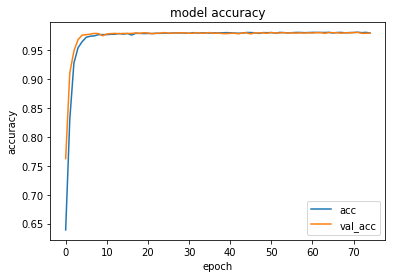

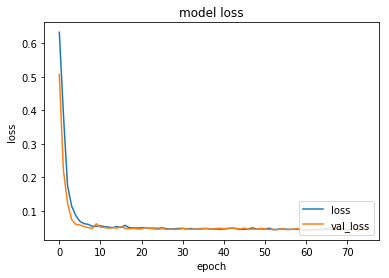

0.9801515386471188
0.9799102521658685
CPU times: user 27min 29s, sys: 17min 57s, total: 45min 27s
Wall time: 1h 3min 11s


In [0]:
# error処置
%%time
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

K.clear_session()
# モデル構築開始
model = Sequential()

model.add(Conv2D(32, (5, 5),padding='same', input_shape=(image_size,image_size,1), activation='relu'))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# compile: どのような学習処理を行なうかを設定
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',#損失関数
              optimizer=Adam(lr=1e-3),#最適化手法
              metrics=['accuracy'])

model.summary()


# ★ローカル環境で実行してください.
# import keras
# import pydotplus
# from tensorflow.python.keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model.jpg',show_shapes=True,show_layer_names=True)
# plt.imshow(load_img('model.jpg'))

# Precision & Recall curve: https://qiita.com/cvusk/items/e3ca93f93a5921c1a772
#tb_cb = keras.callbacks.TensorBoard(log_dir="tflog/", histogram_freq=1, write_graph=True)
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto')
history = model.fit(X_train, y_train, batch_size=512, epochs=200, validation_split=0.2, shuffle=True, verbose=1, callbacks=[es_cb])


# 精度の履歴をプロット
def plot_history(history):
    print(history.history.keys())

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plt.show()
plot_history(history)
print(max(history.history['acc']))
print(max(history.history['val_acc']))


In [0]:
# # モデルの出力
from keras.models import model_from_json
open('MSNN10k.json',"w").write(model.to_json())
model.save_weights('MSNN10k.h5')

In [0]:
# テスト
%%time
import random
# ---- 保存用配列を確保 ---
right = 0
full_cnt = 0;
for index, folder in enumerate(folders):
    files = glob.glob(folder+"*.png")
    random.shuffle(files)
    for i, file in enumerate(files):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(image_size, image_size))
        image = image.reshape(image_size, image_size,1)
        image = np.array([image]) # 4次元配列にしないと入力できない
        y_pred_probability = model.predict(image)
        
        # 出力をクラスベクトルから整数値に変換
        y_pred = np.argmax(y_pred_probability, axis=1)
        
        # 予測結果の表示
        if index <3:
          class_index = 0
        else:
          class_index = 1
        #print('正解ラベル: {0}, 予測結果： {1} with the probability of {2}'.format(class_index, y_pred,y_pred_probability[0][y_pred])) # やっぱり合ってる.
        full_cnt = full_cnt +1
        if  y_pred == y_pred_probability[0][y_pred]:
          right = right +1 

right = right/full_cnt
print(right)

    

0.25224258970358815
CPU times: user 4min 1s, sys: 27 s, total: 4min 28s
Wall time: 3min 38s
